**Mount the Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Necessary Header files**

In [28]:
import h5py
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Read the hdf5 dataset**

In [3]:
def printname(name):
    print(name)

# openning the file
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/EMSCA/Data/em-dataset.h5', 'r')

# printing the attributes of the file
for item in hf.attrs.keys():
    print(item + ":", hf.attrs[item])


dataset_creater: Asanka P. Sayakkara <asa@ucsc.cmb.ac.lk>
dataset_date: 2021-03-01
dataset_version: 1


In [ ]:
print(hf)

<HDF5 file "em-dataset.h5" (mode r)>


**View full data structure**

In [4]:
# viewing full data structure
hf.visit(printname)

internet-of-things
internet-of-things/amazon-echo-dot
internet-of-things/amazon-echo-dot/asking-a-definition
internet-of-things/amazon-echo-dot/asking-for-time
internet-of-things/amazon-echo-dot/asking-to-play-radio
internet-of-things/amazon-echo-dot/controlling-lightbulb
internet-of-things/amazon-echo-dot/device-idle
internet-of-things/amazon-echo-dot/device-muted
internet-of-things/amazon-echo-dot/device-resetting
internet-of-things/amazon-echo-dot/just-wakeup-word
internet-of-things/amazon-echo-dot/powering-on
internet-of-things/amazon-echo-show5
internet-of-things/amazon-echo-show5/asking-a-definition
internet-of-things/amazon-echo-show5/asking-for-time
internet-of-things/amazon-echo-show5/asking-to-play-radio
internet-of-things/amazon-echo-show5/controlling-lightbulb
internet-of-things/amazon-echo-show5/device-idle
internet-of-things/amazon-echo-show5/device-resetting
internet-of-things/amazon-echo-show5/just-wakeup-word
internet-of-things/amazon-echo-show5/powering-off
internet-o

In [5]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

**Settings**

In [6]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

**Load the lables from load file**

In [7]:
# reading a dataset/labels
data = hf.get('/smartphones/iphone4s')
labels = np.array(data)

print(labels)

['calendar-app' 'camera-photo' 'camera-video' 'email-app' 'gallary-app'
 'home-screen' 'idle' 'phone-app' 'sms-app' 'web-browser-app']


**Preparing dataset for class label 0**

In [8]:
# reading a data for class  label 0
data = hf.get('smartphones/iphone4s/calendar-app')
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.03125  +0.j       0.       +0.j       0.03125  -0.03125j  ...
 0.0234375-0.03125j  0.0546875-0.015625j 0.015625 +0.j      ]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
33428
(2048, 33428)
[0.02488573 0.01461495 0.00517034 ... 0.00663629 0.00442523 0.01420262]
(10000, 2048)
(10000,)


**Preparing dataset for class label 1**

In [9]:
# reading a data for class  label 1
data = hf.get('/smartphones/iphone4s/camera-photo')
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.0078125-0.03125j    0.0234375-0.015625j   0.0234375+0.j        ...
 -0.0078125+0.j         0.03125  -0.0234375j  0.0390625-0.015625j ]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
38645
(2048, 38645)
[0.02234858 0.01373823 0.0042615  ... 0.00250264 0.00466313 0.01401206]
(20000, 2048)
(20000,)


**Preparing dataset for class label 2**

In [10]:
# reading a data for class  label 2
data = hf.get('smartphones/iphone4s/camera-video')
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.03125  -0.0078125j  0.0234375-0.0234375j  0.015625 -0.0078125j ...
  0.0078125-0.0390625j -0.015625 +0.j         0.0625   +0.j       ]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
48315
(2048, 48315)
[0.02550059 0.01659532 0.00878719 ... 0.01732491 0.01035367 0.01616922]
(30000, 2048)
(30000,)


**Preparing dataset for class label 3**

In [11]:
# reading a data for class  label 3
data = hf.get('/smartphones/iphone4s/email-app')
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.03125  -0.015625j   0.015625 -0.015625j  -0.0078125-0.015625j  ...
  0.0078125+0.j        -0.0078125+0.0078125j  0.0234375-0.0234375j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
36129
(2048, 36129)
[0.04209983 0.02760862 0.02790638 ... 0.02090047 0.02404625 0.03802438]
(40000, 2048)
(40000,)


***Preparing dataset for class label 4***

In [12]:
# reading a data for class  label 4
data = hf.get('/smartphones/iphone4s/gallary-app')
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375-0.015625j  0.0078125+0.0078125j 0.0078125-0.015625j  ...
 0.0234375+0.015625j  0.       -0.015625j  0.015625 -0.015625j ]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
40949
(2048, 40949)
[0.02759015 0.01684842 0.00878586 ... 0.01630829 0.00898384 0.01655869]
(50000, 2048)
(50000,)


**Preparing dataset for label 5**

In [13]:
# reading a data for class  label 5
data = hf.get('/smartphones/iphone4s/home-screen')
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0390625-0.0234375j 0.0078125-0.0078125j 0.       +0.j        ...
 0.0078125+0.j        0.       -0.0625j    0.015625 -0.0078125j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
38694
(2048, 38694)
[0.03421063 0.02778965 0.02299778 ... 0.01896842 0.02162224 0.03236637]
(60000, 2048)
(60000,)


**Preparing dataset for label 6**

In [14]:
# reading a data for class  label 6
data = hf.get('/smartphones/iphone4s/idle')
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.       +0.0078125j 0.0078125-0.0234375j 0.015625 -0.015625j  ...
 0.03125  -0.0078125j 0.015625 -0.03125j   0.0234375-0.0078125j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
42242
(2048, 42242)
[0.0231918  0.01341356 0.00473634 ... 0.00485555 0.00465081 0.01240863]
(70000, 2048)
(70000,)


**Preparing dataset for label 7**

In [15]:
# reading a data for class  label 7
data = hf.get('/smartphones/iphone4s/phone-app')
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.       -0.03125j    0.046875 -0.015625j   0.0234375+0.0078125j ...
  0.0078125-0.015625j   0.0546875-0.015625j  -0.0078125-0.0078125j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
34233
(2048, 34233)
[0.02253933 0.01400823 0.00429395 ... 0.00248525 0.00471229 0.01189943]
(80000, 2048)
(80000,)


**Preparing dataset for label 8**

In [16]:
# reading a data for class  label 8
data = hf.get('/smartphones/iphone4s/sms-app')
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0390625-0.03125j   0.0234375-0.0078125j 0.015625 -0.0078125j ...
 0.0078125-0.03125j   0.       -0.0078125j 0.015625 -0.0234375j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
42207
(2048, 42207)
[0.03743655 0.03107382 0.03086529 ... 0.02413252 0.02411451 0.03702537]
(90000, 2048)
(90000,)


**Preparing dataset for label 9**

In [17]:
# reading a data for class  label 9
data = hf.get('/smartphones/iphone4s/web-browser-app')
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.0078125+0.0078125j  0.0234375-0.0234375j  0.0390625-0.0078125j ...
 -0.015625 -0.015625j   0.0234375-0.0390625j  0.015625 -0.0234375j]


/usr/local/lib/python3.8/dist-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
33209
(2048, 33209)
[0.04312244 0.03490404 0.02452176 ... 0.03249698 0.02744557 0.03319968]
(100000, 2048)
(100000,)


**Save the newly generated dataset as dataframe**

In [ ]:
# df = pd.DataFrame(data=X)
# print (df)

                     0     ...                2047
0      0.007919-0.006800j  ... -0.008307-0.001626j
1      0.015647-0.013556j  ... -0.007269+0.006531j
2      0.015664-0.013822j  ... -0.007546+0.006920j
3      0.015952-0.013029j  ... -0.007961+0.006076j
4      0.015398-0.013920j  ... -0.007631+0.007445j
...                   ...  ...                 ...
99995  0.015469-0.014148j  ... -0.007803+0.007169j
99996  0.015874-0.013751j  ... -0.008015+0.006634j
99997  0.015700-0.013872j  ... -0.007563+0.006673j
99998  0.016120-0.013640j  ... -0.007659+0.006876j
99999  0.016389-0.013217j  ... -0.008413+0.006367j

[100000 rows x 2048 columns]


In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/EMSCA/Model/iphone_dataset.csv', index=False)

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/EMSCA/Model/iphone_label.csv', index=False)

**Build ML Model**

In [18]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/EMSCA/CDP_fro_EMSCA/iphone4S_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 79s 31ms/step - loss: 1.9109 - accuracy: 0.3634 - val_loss: 1.5588 - val_accuracy: 0.6063
Epoch 2/25
2532/2532 [==============================] - 78s 31ms/step - loss: 1.2038 - accuracy: 0.6359 - val_loss: 0.9382 - val_accuracy: 0.6447
Epoch 3/25
2532/2532 [==============================] - 78s 31ms/step - loss: 0.7831 - accuracy: 0.7477 - val_loss: 0.7243 - val_accuracy: 0.7201
Epoch 4/25
2532/2532 [==============================] - 77s 31ms/step - loss: 0.6164 - accuracy: 0.8370 - val_loss: 0.5620 - val_accuracy: 0.9586
Epoch 5/25
2532/2532 [==============================] - 76s 30ms/step - loss: 0.4811 - accuracy: 0.9435 - val_loss: 0.4308 - val_accuracy: 0.9647
Epoch 6/25
2532/2532 [==============================] - 81s 32ms/step - loss: 0.3598 - accuracy: 0.9799 - val_loss: 0.3175 - val_accuracy: 0.9863
Epoch 7/25
2532/2532 [==============================] - 79s 31ms/step - loss: 0.2675 - accuracy: 0.9871 - val_loss: 0.2335 -

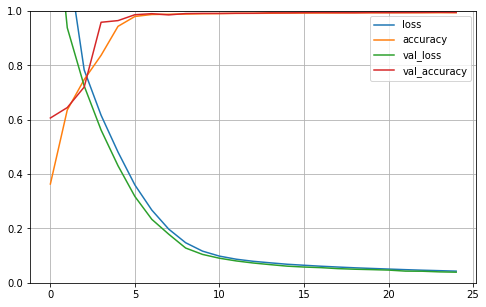

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Test the Model**

In [23]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/EMSCA/CDP_fro_EMSCA/iphone4S_model.h5")

In [24]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 4s 12ms/step - loss: 0.0356 - accuracy: 0.9942
test loss, test acc: [0.035563744604587555, 0.9941999912261963]


In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 4s 12ms/step
[0 6 5 ... 5 5 6]
0


In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1005    0    0    0    0    1    2    0    3    0]
 [   0 1006    0    1    0    0    2    1    0    0]
 [   0    0  988    3    0    0    0    0    2    0]
 [   0    0    0  922    2    4    0    1    8    2]
 [   0    0    0    0 1042    0    0    0    0    1]
 [   0    0    0    9    0 1015    0    0    2    1]
 [   0    2    0    1    0    0  994    0    0    2]
 [   0    1    0    2    0    0    0  971    0    0]
 [   0    0    0    1    0    0    0    0 1000    2]
 [   0    0    0    0    1    0    0    0    1  999]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      0.99      1.00       993
           3       0.98      0.98      0.98       939
           4       1.00      1.00      1.00      1043
           5       1.00      0.99      0.99      1027
           6       1.00      0.99      1.00       999
           7       1.00      1.00   

In [27]:
model.save("/content/drive/MyDrive/Colab Notebooks/EMSCA/CDP_fro_EMSCA/iphone4S_model.h5")

Test Accuracy:0.9942


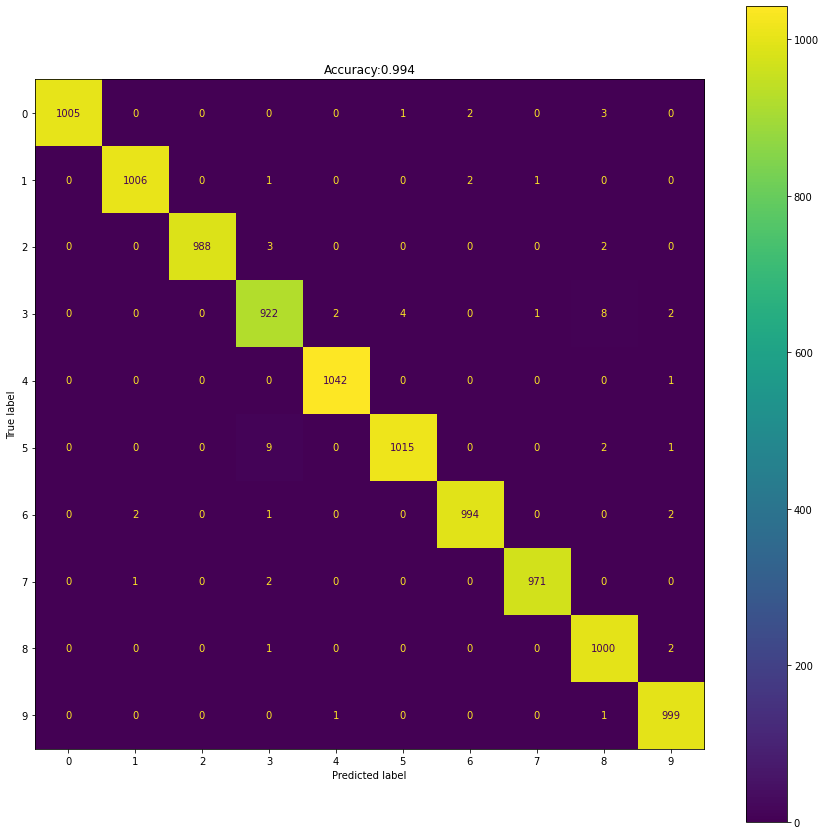

In [29]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/EMSCA/CDP_fro_EMSCA/iPhone4S_confusion_matrix.pdf')